## Análisis de Regresión Lineal
#### Práctica

In [67]:
## Tratamiento de datos
import pandas as pd
import numpy as np
## Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
#path_file = r'C:/Users/nerid/Desktop/BD_Python/UPC/Regresión Lineal/'   

In [69]:
df = pd.read_csv('LifeCycleSavings.csv', encoding = 'latin1', delimiter= ';')

In [70]:
df.shape

(50, 5)

In [71]:
df.head(10)

,pop15,pop75,dpi,ddpi,sr
0,29.35,2.87,2329.68,2.87,11.43
1,23.32,4.41,1507.99,3.93,12.07
2,23.80,4.43,2108.47,3.82,13.17
3,41.89,1.67,189.13,0.22,5.75
4,42.19,0.83,728.47,4.56,12.88
5,31.72,2.85,2982.88,2.43,8.79
6,39.74,1.34,662.86,2.67,0.60
7,44.75,0.67,289.52,6.51,11.90
8,46.64,1.06,276.65,3.08,4.98
9,47.64,1.14,471.24,2.80,10.78


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop15   50 non-null     float64
 1   pop75   50 non-null     float64
 2   dpi     50 non-null     float64
 3   ddpi    50 non-null     float64
 4   sr      50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [73]:
df.isna().sum()

pop15    0
pop75    0
dpi      0
ddpi     0
sr       0
dtype: int64

In [74]:
df.corr()

,pop15,pop75,dpi,ddpi,sr
pop15,1.000000,-0.908479,-0.756188,-0.047826,-0.455538
pop75,-0.908479,1.000000,0.787000,0.025321,0.316521
dpi,-0.756188,0.787000,1.000000,-0.129486,0.220359
ddpi,-0.047826,0.025321,-0.129486,1.000000,0.304787
sr,-0.455538,0.316521,0.220359,0.304787,1.000000


<Axes: >

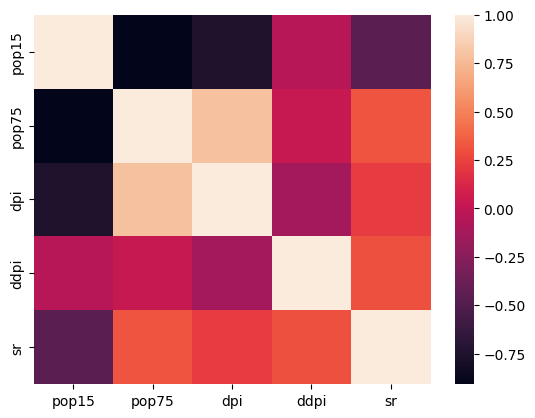

In [75]:
sns.heatmap(df.corr())

<Axes: >

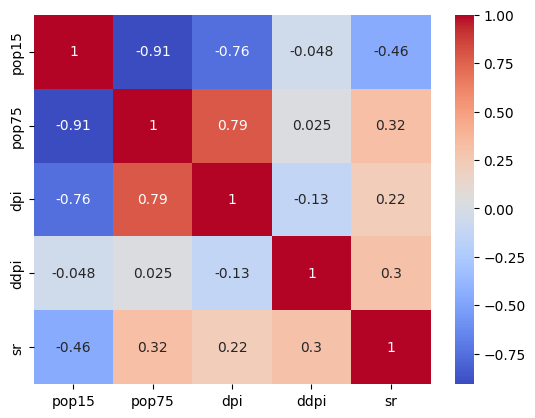

In [76]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<Axes: >

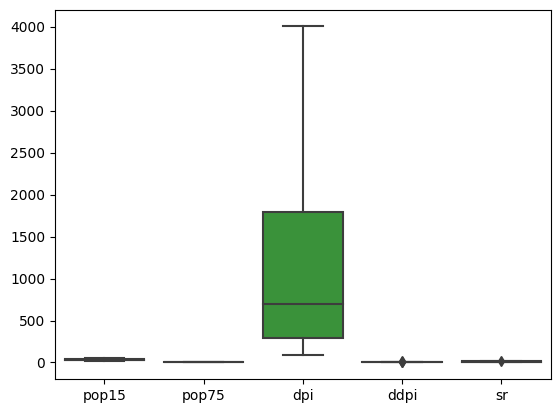

In [77]:
sns.boxplot(data=df)

In [78]:
#X=df[['pop15','pop75','dpi','ddpi']]
X=df[['pop15','dpi','ddpi']]
y=df['sr']

In [79]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1280)

In [80]:
# Creamos una instancia del modelo en la variable lm
lm = LinearRegression()

In [81]:
# Entrenamos (ajustamos) el modelo con los datos de entrenamiento
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
# Pendiente
print("Pendiente: ",lm.coef_)
# Interceptor
print("Interceptor: ",lm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Pendiente:  [-0.24966949 -0.00102029  0.37237988]
Interceptor:  18.47500805408481


In [83]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
pop15,-0.249669
dpi,-0.001020
ddpi,0.372380


In [84]:
#Realizamos una predicción
Y_pred = lm.predict(X_test)
Y_pred

array([11.41753437,  7.23326307, 10.99426662, 11.31669977, 11.56295485,
        8.35213534, 11.62985646,  8.36360246,  8.33903846, 12.25313912])

In [85]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(sr=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)

,pop15,dpi,ddpi,sr,Pred
12,27.84,1681.25,4.32,11.24,11.417534
16,46.05,289.71,1.48,3.01,7.233263
36,31.92,250.96,2.00,13.30,10.994267
10,24.42,2496.53,3.99,16.85,11.316700
42,23.27,1813.93,2.01,7.81,11.562955
31,41.18,220.56,1.03,2.02,8.352135
46,41.12,380.47,10.23,7.72,11.629856
30,43.56,568.56,3.61,4.44,8.363602
40,43.42,389.66,2.96,5.13,8.339038
21,24.52,1390.00,3.54,14.28,12.253139


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


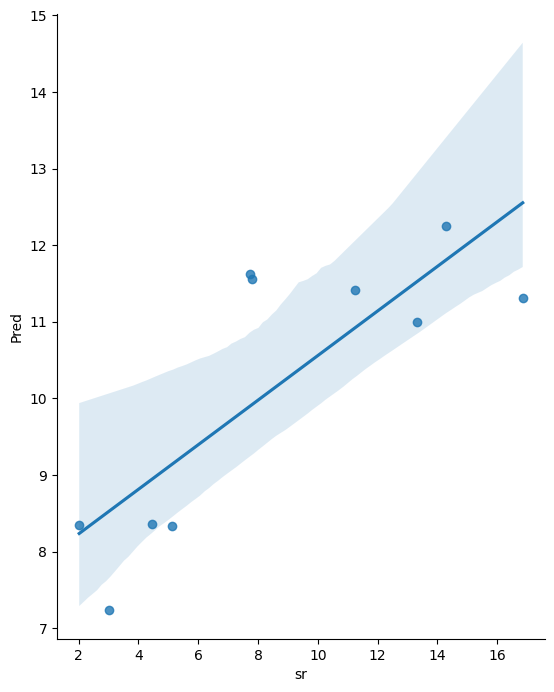

In [86]:
sns.pairplot(df_pred, x_vars=['sr'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [87]:
# calcular estas métricas a mano!
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 3.5394279504485353
MSE: 15.306962203503398
RMSE: 3.912411302956707


In [88]:
# Precisiòn del Modelo
print("Precisión del Modelo: ", metrics.r2_score(y_test,Y_pred))

Precisión del Modelo:  0.3477239441128651


## Buen Trabajo!

### Gracias por Todo
#### Nérida Manrique Tunque